RFM, Cohort Analysis and Customer Segmentation 필사

Source : https://www.kaggle.com/vernon360961/rfm-cohort-analysis-and-customer-segmentation

# 데이터 불러오기

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df.shape

(541909, 8)

# 데이터 전처리

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# quantity, unitprice에 음수값 있는 것을 확인
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include = 'O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [9]:
# 컬럼별 결측치 비율 확인
# CustomerID가 없는 24%는 비회원 주문을 했을 것이라 생각해볼 수 있음
missing_percent = (df.isnull().mean()*100).to_frame()
missing_percent.columns = ['Percentage']
missing_percent.sort_values(by = "Percentage", ascending = False)

,Percentage
CustomerID,24.926694
Description,0.268311
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [14]:
# CustomerID가 없는 값은 id_null 컬럼에 True : 1, False : 0으로체크
df['id_null'] = df['CustomerID'].isnull().astype(int)
df['id_null'].mean()

0.249266943342886

In [17]:
# 국가별 id_null 비율 구해서 null_by_country 변수에 담고 비율 높은 국가 10개 보기
null_by_country = df.groupby('Country')['id_null'].mean().to_frame()
null_by_country = null_by_country.rename(columns = {'id_null' : 'Percentage'})
null_by_country.sort_values('Percentage', ascending = False).head(10)*100

,Percentage
Country,
Hong Kong,100.000000
Unspecified,45.291480
United Kingdom,26.963861
Israel,15.824916
Bahrain,10.526316
EIRE,8.674963
Switzerland,6.243756
Portugal,2.567479
France,0.771298


<AxesSubplot:>

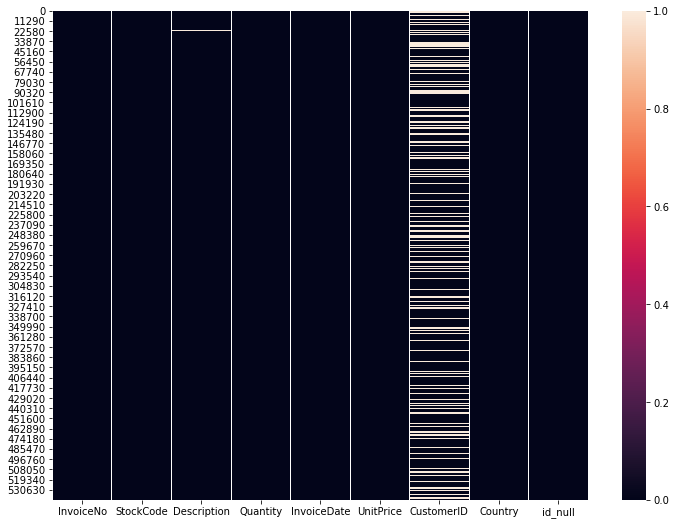

In [18]:
# 결측치 heatmap 시각화
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())

In [19]:
# CustomerID 누락된 데이터 제거
print(df.shape)
df = df.dropna(subset=['CustomerID'])
print(df.shape)

(541909, 9)
(406829, 9)


In [20]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
id_null        0
dtype: int64

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,406829.000000,406829.000000,406829.000000,406829.0
mean,12.061303,3.460471,15287.690570,0.0
std,248.693370,69.315162,1713.600303,0.0
min,-80995.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13953.000000,0.0
50%,5.000000,1.950000,15152.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,38970.000000,18287.000000,0.0


In [22]:
# Quantity 컬럼의 음수 데이터 확인
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


In [30]:
# 고객 중 한 명 데이터 확인해보기
# 구매 취소 데이터에 -가 붙어있는 것으로 보임
df[df['CustomerID']  == 14397]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
182820,552575,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
182821,552575,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-05-10 12:25:00,0.83,14397.0,United Kingdom,0
182822,552575,20846,ZINC HEART LATTICE T-LIGHT HOLDER,12,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
182823,552575,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2011-05-10 12:25:00,7.95,14397.0,United Kingdom,0
182824,552575,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-05-10 12:25:00,1.25,14397.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
533101,581011,22478,BIRDHOUSE GARDEN MARKER,20,2011-12-07 09:22:00,1.25,14397.0,United Kingdom,0
533102,581011,20846,ZINC HEART LATTICE T-LIGHT HOLDER,24,2011-12-07 09:22:00,1.25,14397.0,United Kingdom,0
533103,581011,22600,CHRISTMAS RETROSPOT STAR WOOD,12,2011-12-07 09:22:00,0.85,14397.0,United Kingdom,0
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,0


In [32]:
# Quantity, UnitPrice가 0보다 큰 값만 사용
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.shape

(392692, 9)

In [33]:
# 중복값 제거
print(df.shape)
df = df.drop_duplicates().copy()
print(df.shape)

(392692, 9)
(392692, 9)


In [35]:
# Quantity * UnitPrice 계산한 TotalCost 컬럼 생성
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null,TotalCost
count,392692.000000,392692.000000,392692.000000,392692.0,392692.000000
mean,13.119702,3.125914,15287.843865,0.0,22.631500
std,180.492832,22.241836,1713.539549,0.0,311.099224
min,1.000000,0.001000,12346.000000,0.0,0.001000
25%,2.000000,1.250000,13955.000000,0.0,4.950000
50%,6.000000,1.950000,15150.000000,0.0,12.450000
75%,12.000000,3.750000,16791.000000,0.0,19.800000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000
